# USAU College Nationals Data Prep

In [59]:
import os
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import random

Here's how a 20 team tournament is organized

In [10]:
poolteams = {'Pool A':[1,8,12,13,17],'Pool B':[2,7,11,14,18],'Pool C':[3,6,10,15,19],'Pool D':[4,5,9,16,20]}
poolassignments = pd.DataFrame(poolteams)
poolassignments

,Pool A,Pool B,Pool C,Pool D
0,1,2,3,4
1,8,7,6,5
2,12,11,10,9
3,13,14,15,16
4,17,18,19,20


load in scraped data

In [3]:
df = pd.read_csv('./data/ultimate/CollegeSeries/open_nationals_allgames.csv')
df['pnt_diff'] = df['home_score'] - df['away_score']
df['home_W'] = df['home_score'] > df['away_score']
df.head()

,event,type,home_team,away_team,home_score,away_score,home_seed,away_seed,pnt_diff,home_W
0,USA-Ultimate-D-I-College-Championships/schedul...,pool,Colorado (1),Harvard (8),15,11,1,8,4,True
1,USA-Ultimate-D-I-College-Championships/schedul...,pool,Wisconsin (12),California-San Diego (13),15,7,12,13,8,True
2,USA-Ultimate-D-I-College-Championships/schedul...,pool,Harvard (8),California-San Diego (13),15,14,8,13,1,True
3,USA-Ultimate-D-I-College-Championships/schedul...,pool,Wisconsin (12),Eastern Michigan (17),15,11,12,17,4,True
4,USA-Ultimate-D-I-College-Championships/schedul...,pool,Colorado (1),Eastern Michigan (17),15,9,1,17,6,True


Here's the probabilities for pool play

In [7]:
pool = df[df['type']=='pool']
pool_info = pool[['home_seed','away_seed','pnt_diff','home_W']].groupby(['home_seed','away_seed']).agg(['sum'])
years = pool['event'].nunique()
pool_odds = pool_info['home_W']['sum']/years
pool_odds.head()

home_seed  away_seed
1          8            0.833333
           12           1.000000
           13           0.666667
           17           1.000000
2          7            0.833333
Name: sum, dtype: float64

### Simulate Pool Play

In [47]:
# 5 teams in each pool, n(n-1)/2 games in each pool
nPools = 4
nTeams = 5
nGames = int(nTeams*(nTeams-1)/2)
nSimul = 10000
pA = [[0 for j in range(nGames)] for i in range(nSimul)]
pB = [[0 for j in range(nGames)] for i in range(nSimul)]
pC = [[0 for j in range(nGames)] for i in range(nSimul)]
pD = [[0 for j in range(nGames)] for i in range(nSimul)]
pool_standings = [[{} for j in range(nPools)] for i in range(nSimul)]

In [77]:
# TODO: need to generalize this loop
for l in range(nSimul):
    # Pool A
    pA[l][0] = 1 if (random.uniform(0,1) < pool_odds[1][8]) else 8
    pA[l][1] = 12 if (random.uniform(0,1) < pool_odds[12][13]) else 13
    pA[l][2] = 8 if (random.uniform(0,1) < pool_odds[8][13]) else 13
    pA[l][3] = 12 if (random.uniform(0,1) < pool_odds[12][17]) else 17
    pA[l][4] = 1 if (random.uniform(0,1) < pool_odds[1][17]) else 17
    pA[l][5] = 1 if (random.uniform(0,1) < pool_odds[1][12]) else 12
    pA[l][6] = 8 if (random.uniform(0,1) < pool_odds[8][17]) else 17
    pA[l][7] = 1 if (random.uniform(0,1) < pool_odds[1][13]) else 13
    pA[l][8] = 8 if (random.uniform(0,1) < pool_odds[8][12]) else 12
    pA[l][9] = 13 if (random.uniform(0,1) < pool_odds[13][17]) else 17
    
    # Pool B
    pB[l][0] = 2 if (random.uniform(0,1) < pool_odds[2][18]) else 18
    pB[l][1] = 7 if (random.uniform(0,1) < pool_odds[7][14]) else 14
    pB[l][2] = 2 if (random.uniform(0,1) < pool_odds[2][7]) else 7
    pB[l][3] = 11 if (random.uniform(0,1) < pool_odds[11][14]) else 14
    pB[l][4] = 11 if (random.uniform(0,1) < pool_odds[11][18]) else 18
    pB[l][5] = 2 if (random.uniform(0,1) < pool_odds[2][11]) else 11
    pB[l][6] = 7 if (random.uniform(0,1) < pool_odds[7][18]) else 18
    pB[l][7] = 14 if (random.uniform(0,1) < pool_odds[14][18]) else 18
    pB[l][8] = 7 if (random.uniform(0,1) < pool_odds[7][11]) else 11
    pB[l][9] = 2 if (random.uniform(0,1) < pool_odds[2][14]) else 14
    
    # Pool C
    pC[l][0] = 6 if (random.uniform(0,1) < pool_odds[6][15]) else 15
    pC[l][1] = 10 if (random.uniform(0,1) < pool_odds[10][19]) else 19
    pC[l][2] = 3 if (random.uniform(0,1) < pool_odds[3][6]) else 6
    pC[l][3] = 10 if (random.uniform(0,1) < pool_odds[10][15]) else 15
    pC[l][4] = 3 if (random.uniform(0,1) < pool_odds[3][19]) else 19
    pC[l][5] = 15 if (random.uniform(0,1) < pool_odds[15][19]) else 19
    pC[l][6] = 3 if (random.uniform(0,1) < pool_odds[3][10]) else 10
    pC[l][7] = 6 if (random.uniform(0,1) < pool_odds[6][19]) else 19
    pC[l][8] = 3 if (random.uniform(0,1) < pool_odds[3][15]) else 15
    pC[l][9] = 6 if (random.uniform(0,1) < pool_odds[6][10]) else 10
    
    # Pool D
    pD[l][0] = 5 if (random.uniform(0,1) < pool_odds[5][16]) else 16
    pD[l][1] = 9 if (random.uniform(0,1) < pool_odds[9][20]) else 20
    pD[l][2] = 4 if (random.uniform(0,1) < pool_odds[4][20]) else 20
    pD[l][3] = 9 if (random.uniform(0,1) < pool_odds[9][16]) else 16
    pD[l][4] = 4 if (random.uniform(0,1) < pool_odds[4][5]) else 5
    pD[l][5] = 4 if (random.uniform(0,1) < pool_odds[4][9]) else 9
    pD[l][6] = 16 if (random.uniform(0,1) < pool_odds[16][20]) else 20
    pD[l][7] = 5 if (random.uniform(0,1) < pool_odds[5][20]) else 20
    pD[l][8] = 4 if (random.uniform(0,1) < pool_odds[4][16]) else 16
    pD[l][9] = 5 if (random.uniform(0,1) < pool_odds[5][9]) else 9

In [162]:
poolAresults = pd.DataFrame(pA).apply(lambda x: x.value_counts(),axis=1).fillna(0)
poolBresults = pd.DataFrame(pB).apply(lambda x: x.value_counts(),axis=1).fillna(0)
poolCresults = pd.DataFrame(pC).apply(lambda x: x.value_counts(),axis=1).fillna(0)
poolDresults = pd.DataFrame(pD).apply(lambda x: x.value_counts(),axis=1).fillna(0)
poolAresults.head()

,1,8,12,13,17
0,4.0,3.0,1.0,2.0,0.0
1,2.0,4.0,2.0,2.0,0.0
2,4.0,3.0,1.0,0.0,2.0
3,4.0,1.0,2.0,2.0,1.0
4,3.0,4.0,1.0,1.0,1.0


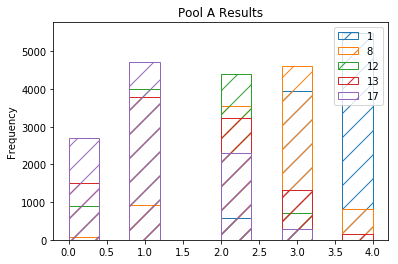

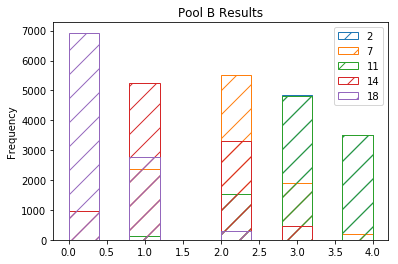

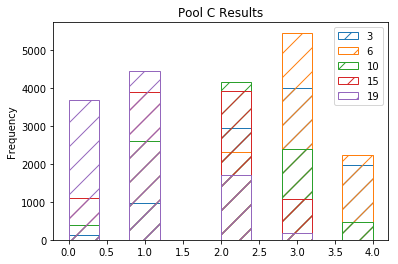

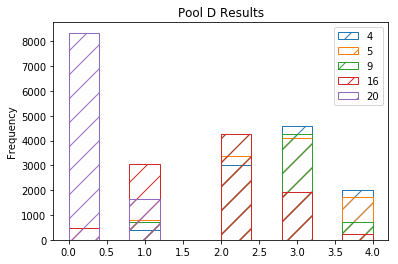

In [173]:
poolAresults.plot.hist(title="Pool A Results",histtype='step',hatch='/')
poolBresults.plot.hist(title="Pool B Results",histtype='step',hatch='/')
poolCresults.plot.hist(title="Pool C Results",histtype='step',hatch='/')
poolDresults.plot.hist(title="Pool D Results",histtype='step',hatch='/')

In [163]:
poolAtop3 = pd.DataFrame([poolAresults.T[j].nlargest(n=3).reset_index()['index'] for j in range(nSimul)]).reset_index(drop=True)
poolBtop3 = pd.DataFrame([poolBresults.T[j].nlargest(n=3).reset_index()['index'] for j in range(nSimul)]).reset_index(drop=True)
poolCtop3 = pd.DataFrame([poolCresults.T[j].nlargest(n=3).reset_index()['index'] for j in range(nSimul)]).reset_index(drop=True)
poolDtop3 = pd.DataFrame([poolDresults.T[j].nlargest(n=3).reset_index()['index'] for j in range(nSimul)]).reset_index(drop=True)
poolAtop3.head()

,0,1,2
0,1,8,13
1,8,1,12
2,1,8,17
3,1,12,13
4,8,1,12


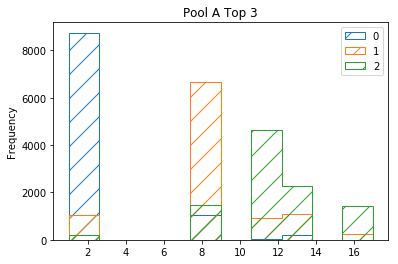

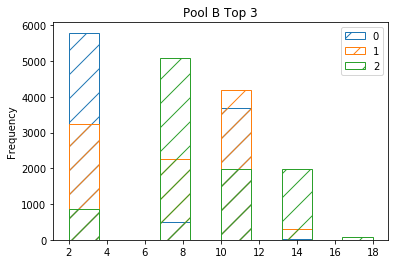

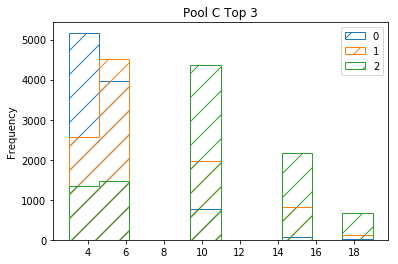

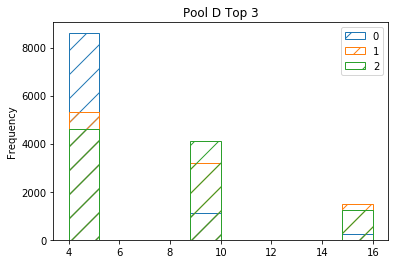

In [171]:
poolAtop3.plot.hist(title="Pool A Top 3",histtype='step',hatch='/')
poolBtop3.plot.hist(title="Pool B Top 3",histtype='step',hatch='/')
poolCtop3.plot.hist(title="Pool C Top 3",histtype='step',hatch='/')
poolDtop3.plot.hist(title="Pool D Top 3",histtype='step',hatch='/')

In [183]:
unique_el, counts_el = np.unique(poolAtop3[0],return_counts=True)
prob_top0_pA = dict(zip(unique_el,counts_el/nSimul))
print(f"probability of starting team seeds being the 1 seed in Pool A at the end of pool play: {prob_top0_pA}")
unique_el, counts_el = np.unique(poolAtop3[1],return_counts=True)
prob_top1_pA = dict(zip(unique_el,counts_el/nSimul))
print(f"probability of starting team seeds being the 2 seed in Pool A at the end of pool play: {prob_top1_pA}")
unique_el, counts_el = np.unique(poolAtop3[2],return_counts=True)
prob_top2_pA = dict(zip(unique_el,counts_el/nSimul))
print(f"probability of starting team seeds being the 3 seed in Pool A at the end of pool play: {prob_top2_pA}")

probability of starting team seeds being the 1 seed in Pool A at the end of pool play: {1: 0.8747, 8: 0.1049, 12: 0.0015, 13: 0.0182, 17: 0.0007}
probability of starting team seeds being the 2 seed in Pool A at the end of pool play: {1: 0.1045, 8: 0.6673, 12: 0.093, 13: 0.11, 17: 0.0252}
probability of starting team seeds being the 3 seed in Pool A at the end of pool play: {1: 0.0208, 8: 0.1462, 12: 0.4635, 13: 0.2275, 17: 0.142}


In [184]:
unique_el, counts_el = np.unique(poolBtop3[0],return_counts=True)
prob_top0_pB = dict(zip(unique_el,counts_el/nSimul))
print(f"probability of starting team seeds being the 1 seed in Pool B at the end of pool play: {prob_top0_pB}")
unique_el, counts_el = np.unique(poolBtop3[1],return_counts=True)
prob_top1_pB = dict(zip(unique_el,counts_el/nSimul))
print(f"probability of starting team seeds being the 2 seed in Pool B at the end of pool play: {prob_top1_pB}")
unique_el, counts_el = np.unique(poolBtop3[2],return_counts=True)
prob_top2_pB = dict(zip(unique_el,counts_el/nSimul))
print(f"probability of starting team seeds being the 3 seed in Pool B at the end of pool play: {prob_top2_pB}")

probability of starting team seeds being the 1 seed in Pool B at the end of pool play: {2: 0.5798, 7: 0.0504, 11: 0.3687, 14: 0.0011}
probability of starting team seeds being the 2 seed in Pool B at the end of pool play: {2: 0.3232, 7: 0.2266, 11: 0.4199, 14: 0.0303}
probability of starting team seeds being the 3 seed in Pool B at the end of pool play: {2: 0.0862, 7: 0.5085, 11: 0.1996, 14: 0.1973, 18: 0.0084}


In [185]:
unique_el, counts_el = np.unique(poolCtop3[0],return_counts=True)
prob_top0_pC = dict(zip(unique_el,counts_el/nSimul))
print(f"probability of starting team seeds being the 1 seed in Pool C at the end of pool play: {prob_top0_pC}")
unique_el, counts_el = np.unique(poolCtop3[1],return_counts=True)
prob_top1_pC = dict(zip(unique_el,counts_el/nSimul))
print(f"probability of starting team seeds being the 2 seed in Pool C at the end of pool play: {prob_top1_pC}")
unique_el, counts_el = np.unique(poolCtop3[2],return_counts=True)
prob_top2_pC = dict(zip(unique_el,counts_el/nSimul))
print(f"probability of starting team seeds being the 3 seed in Pool C at the end of pool play: {prob_top2_pC}")

probability of starting team seeds being the 1 seed in Pool C at the end of pool play: {3: 0.5172, 6: 0.3975, 10: 0.0775, 15: 0.0066, 19: 0.0012}
probability of starting team seeds being the 2 seed in Pool C at the end of pool play: {3: 0.2568, 6: 0.4516, 10: 0.1968, 15: 0.0818, 19: 0.013}
probability of starting team seeds being the 3 seed in Pool C at the end of pool play: {3: 0.1337, 6: 0.147, 10: 0.4355, 15: 0.2158, 19: 0.068}


In [186]:
unique_el, counts_el = np.unique(poolDtop3[0],return_counts=True)
prob_top0_pD = dict(zip(unique_el,counts_el/nSimul))
print(f"probability of starting team seeds being the 1 seed in Pool D at the end of pool play: {prob_top0_pD}")
unique_el, counts_el = np.unique(poolDtop3[1],return_counts=True)
prob_top1_pD = dict(zip(unique_el,counts_el/nSimul))
print(f"probability of starting team seeds being the 2 seed in Pool D at the end of pool play: {prob_top1_pD}")
unique_el, counts_el = np.unique(poolDtop3[2],return_counts=True)
prob_top2_pD = dict(zip(unique_el,counts_el/nSimul))
print(f"probability of starting team seeds being the 3 seed in Pool D at the end of pool play: {prob_top2_pD}")

probability of starting team seeds being the 1 seed in Pool D at the end of pool play: {4: 0.5568, 5: 0.3048, 9: 0.1122, 16: 0.0262}
probability of starting team seeds being the 2 seed in Pool D at the end of pool play: {4: 0.207, 5: 0.3255, 9: 0.3193, 16: 0.1482}
probability of starting team seeds being the 3 seed in Pool D at the end of pool play: {4: 0.2004, 5: 0.2624, 9: 0.4112, 16: 0.126}


What we're missing in this simulation is the idea of a tie-breaker. Given the case where there is a two-, three-, or five-way tie in win total, the tie(s) is(are) broken via point-differential.

### Bracketplay

We are going to make the assumption that the seeding matchup result does not vary by which part of the bracket it occurs. We don't have enough data here to disprove that assumption, but it could be interesting to explore.

In [202]:
brak = df[df['type']=='bracket'][['event','home_team','away_team','home_score','away_score','home_seed','away_seed']]
# reorganize seeding
brak1 = brak[brak['home_seed'] > brak['away_seed']]
brak1.columns = ['event','away_team','home_team','away_score','home_score','away_seed','home_seed']
brak = brak[brak['home_seed'] < brak['away_seed']].append(brak1,ignore_index=True,sort=False)
brak.head()

,event,home_team,away_team,home_score,away_score,home_seed,away_seed
0,USA-Ultimate-D-I-College-Championships/schedul...,Colorado (1),North Carolina (6),15,10,1,6
1,USA-Ultimate-D-I-College-Championships/schedul...,Colorado (1),Oregon (4),15,8,1,4
2,USA-Ultimate-D-I-College-Championships/schedul...,Texas (3),Oregon (4),10,15,3,4
3,USA-Ultimate-D-I-College-Championships/schedul...,Michigan (11),Tufts (15),15,12,11,15
4,USA-Ultimate-D-I-College-Championships/schedul...,Texas (3),Central Florida (14),15,14,3,14


Here's the probabilities for bracket play 

In [358]:
brak['pnt_diff'] = brak['home_score'] - brak['away_score']
brak['home_W'] = brak['home_score'] > brak['away_score']
brak_info = brak[['home_seed','away_seed','pnt_diff','home_W']].groupby(['home_seed','away_seed']).agg(['sum'])
years = brak['event'].nunique()
brak_odds = brak_info['home_W']['sum']/years
brak_odds#.head()

home_seed  away_seed
1          2            0.166667
           4            0.500000
           6            0.333333
           7            0.000000
           9            0.000000
           10           0.166667
           11           0.166667
2          3            0.166667
           5            0.333333
           6            0.000000
           8            0.166667
           9            0.166667
           10           0.000000
           15           0.166667
3          4            0.166667
           5            0.166667
           7            0.166667
           9            0.166667
           11           0.000000
           14           0.333333
           15           0.166667
4          5            0.166667
           6            0.000000
           10           0.166667
           11           0.166667
           14           0.166667
           17           0.166667
5          6            0.166667
           8            0.500000
           12         

#### Simulate Chapionship Bracketplay

copy the probabilities over

In [359]:
# add missing matchups that may cause error
for i in [y for y in range(1,20) if y not in brak_odds.index.levels[0]]:
    for j in range(i+1,21):
        brak_odds[i,j]=0.7
for i in brak_odds.index.levels[0]:
    for j in [x for x in range(i+1,21) if x not in brak_odds[i].index]:
        brak_odds[i,j]=0.7
# copy inverse probabilities over
for i in brak_odds.index.levels[0]:
    for j in brak_odds[i].index:
        #print(f"brak_odds[{j},{i}] = {1-brak_odds[i][j]}")
        brak_odds[j,i] = 1-brak_odds[i][j]
#print(brak_odds)

In [360]:
bP = [[0 for j in range(nSimul)] for i in range(4)] # prequarters
bQ = [[0 for j in range(nSimul)] for i in range(4)] # quarters
bS = [[0 for j in range(nSimul)] for i in range(2)] # semifinals
bF = [[0 for j in range(nSimul)] for i in range(1)] # finals
for l in range(nSimul):
    # prequarters
    A2 = poolAtop3[1][l]
    A3 = poolAtop3[2][l]
    B2 = poolBtop3[1][l]
    B3 = poolBtop3[2][l]
    C2 = poolCtop3[1][l]
    C3 = poolCtop3[2][l]
    D2 = poolDtop3[1][l]
    D3 = poolDtop3[2][l]
    #print(f"A2: {A2}, A3: {A3}, B2: {B2}, B3: {B3}, C2: {C2}, C3: {C3}, D2: {D2}, D3: {D3}")
    bP[0][l] = B2 if (random.uniform(0,1) < brak_odds[B2][C3]) else C3
    bP[1][l] = C2 if (random.uniform(0,1) < brak_odds[C2][B3]) else B3
    bP[2][l] = D2 if (random.uniform(0,1) < brak_odds[D2][A3]) else A3
    bP[3][l] = A2 if (random.uniform(0,1) < brak_odds[A2][D3]) else D3
    
    # quarters
    #print(f"G1: {bP[0][l]}, G2: {bP[1][l]}, G3: {bP[2][l]}, G4: {bP[3][l]}")
    A1 = poolAtop3[0][l]
    B1 = poolBtop3[0][l]
    C1 = poolCtop3[0][l]
    D1 = poolDtop3[0][l]
    #print(f"A1: {A1}, B1: {B1}, C1: {C1}, D1: {D1}")
    bQ[0][l] = bP[0][l] if (random.uniform(0,1) < brak_odds[bP[0][l]][A1]) else A1
    bQ[1][l] = bP[1][l] if (random.uniform(0,1) < brak_odds[bP[1][l]][D1]) else D1
    bQ[2][l] = bP[2][l] if (random.uniform(0,1) < brak_odds[bP[2][l]][C1]) else C1
    bQ[3][l] = bP[3][l] if (random.uniform(0,1) < brak_odds[bP[3][l]][B1]) else B1
    
    # semifinals
    #print(f"Q1: {bQ[0][l]}, Q2: {bQ[1][l]}, Q3: {bQ[2][l]}, Q4: {bQ[3][l]}")
    bS[0][l] = bQ[0][l] if (random.uniform(0,1) < brak_odds[bQ[0][l]][bQ[1][l]]) else bQ[1][l]
    bS[1][l] = bQ[2][l] if (random.uniform(0,1) < brak_odds[bQ[2][l]][bQ[3][l]]) else bQ[3][l]
    
    # finals
    #print(f"S1: {bS[0][l]}, S2: {bS[1][l]}")
    bF[0][l] = bS[0][l] if (random.uniform(0,1) < brak_odds[bS[0][l]][bS[1][l]]) else bS[1][l]

In [363]:
preq_finalists = pd.DataFrame(np.array(bP).T)
quar_finalists = pd.DataFrame(np.array(bQ).T)
semi_finalists = pd.DataFrame(np.array(bS).T)
champions = pd.DataFrame(np.array(bF).T)
preq_finalists.head()

,0,1,2,3
0,2,7,4,5
1,10,14,16,1
2,15,14,4,9
3,10,11,5,9
4,2,7,12,9


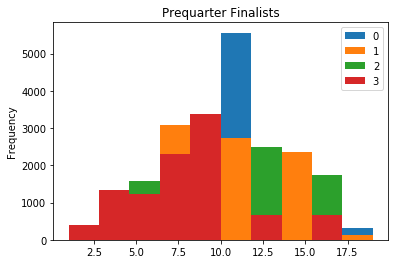

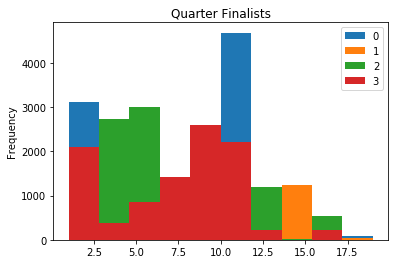

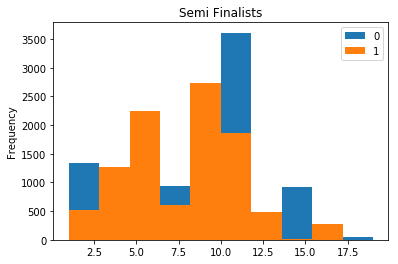

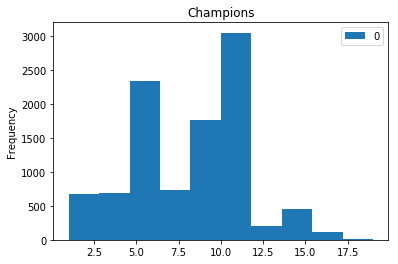

In [362]:
preq_finalists.plot.hist(title="Prequarter Finalists")
quar_finalists.plot.hist(title="Quarter Finalists")
semi_finalists.plot.hist(title="Semi Finalists")
champions.plot.hist(title="Champions")